<a href="https://colab.research.google.com/github/joaomottin/DataScienceLab/blob/main/CodigoGraficoAvaliativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files


uploaded = files.upload()


Saving SMSSpamCollection to SMSSpamCollection


In [3]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['SMSSpamCollection']),sep = '\t')
print(df)

     target                                               text
0       ham  Go until jurong point, crazy.. Available only ...
1       ham                      Ok lar... Joking wif u oni...
2      spam  Free entry in 2 a wkly comp to win FA Cup fina...
3       ham  U dun say so early hor... U c already then say...
4       ham  Nah I don't think he goes to usf, he lives aro...
...     ...                                                ...
5567   spam  This is the 2nd time we have tried 2 contact u...
5568    ham               Will ü b going to esplanade fr home?
5569    ham  Pity, * was in mood for that. So...any other s...
5570    ham  The guy did some bitching but I acted like i'd...
5571    ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
df.shape

(5572, 2)

In [5]:
df['target'] = df['target'].apply(lambda x: 0 if x == 'ham' else 1)

In [6]:
df.groupby('target')['target'].count()

,target
target,
0,4825
1,747


In [7]:
contagem_classes = df.groupby('target')['target'].count()
total = contagem_classes.sum()
porcentagem_classes = contagem_classes / total * 100
print(porcentagem_classes)


target
0    86.593683
1    13.406317
Name: target, dtype: float64


In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
X = df['text']
y= df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [9]:
#!pip install scikit-learn==1.2.2
from sklearn.feature_extraction.text import TfidfVectorizer

#vectorizer = TfidfVectorizer()
#tfidf_matrix = vectorizer.fit_transform(df['text'])
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


# Get the English stop words
stop_words = stopwords.words('english')

# Assuming 'df' has a 'text' column with raw text data and X_train and X_test are Series
X_train_indices = X_train.index  # Get indices of X_train elements
X_test_indices = X_test.index    # Get indices of X_test elements

# Assuming 'df' has a 'text' column with raw text data
X_train_text = df['text'].iloc[X_train_indices] # Extract the text corresponding to X_train indices
X_test_text = df['text'].iloc[X_test_indices]   # Extract the text corresponding to X_test indices

#vectorizer = TfidfVectorizer(analyzer=u'word',norm = 'l1',ngram_range = (2,3), lowercase=True,stop_words=stop_words,binary=False,use_idf=True,token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b',max_features=100) # Initialize TfidfVectorizer
vectorizer = TfidfVectorizer()
# Fit and transform the raw text data
X_train_tfidf = vectorizer.fit_transform(X_train_text )
X_test_tfidf = vectorizer.transform(X_test_text)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [12]:
y_pred = model.predict(X_test_tfidf)

In [13]:
y_pred_proba = model.predict_proba(X_test_tfidf)[:, 1]

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9784637473079684
Precision: 1.0
Recall: 0.8387096774193549


In [15]:
# Assuming 'positive' is the first class (index 0)
positive_class_index = 1

# Extract probabilities for the positive class
probs = model.predict_proba(X_test_tfidf)
positive_probs = probs[:,1]

# Print the first 5 probabilities
print(positive_probs)

[0.01 0.08 0.02 ... 0.01 0.04 0.02]


In [16]:
df_pos = pd.DataFrame({"prob_spam": positive_probs,"target":y_test})

In [17]:
df_pos

,prob_spam,target
3245,0.01,0
944,0.08,0
1044,0.02,0
2484,0.00,0
812,0.09,0
...,...,...
668,0.00,0
218,0.00,0
5536,0.01,0
1657,0.04,0


In [18]:
df_pos.shape

(1393, 2)

In [19]:
df_apenas_positivo = df_pos.loc[df_pos['target']==1]

In [20]:
df_apenas_positivo.shape

(186, 2)

In [21]:
df_apenas_positivo

,prob_spam,target
401,0.85,1
5567,0.94,1
881,0.38,1
1961,0.66,1
2664,0.99,1
...,...,...
1456,0.72,1
2209,0.99,1
4127,0.92,1
3132,0.18,1


In [22]:
df_pos

,prob_spam,target
3245,0.01,0
944,0.08,0
1044,0.02,0
2484,0.00,0
812,0.09,0
...,...,...
668,0.00,0
218,0.00,0
5536,0.01,0
1657,0.04,0


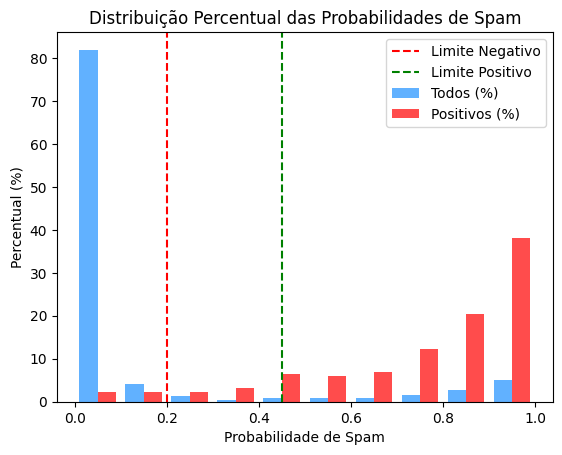

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Supondo que df_pos e df_apenas_positivo já estejam definidos:
# df_apenas_positivo = df_pos[df_pos["target"] == 1]

# Parâmetro customizável de step
step = 0.1
bins = np.arange(0, 1 + step, step)

# Histogramas em contagem
hist_all, _ = np.histogram(df_pos["prob_spam"], bins=bins)
hist_pos, _ = np.histogram(df_apenas_positivo["prob_spam"], bins=bins)

# Convertendo para percentual (%)
hist_all_pct = (hist_all / hist_all.sum()) * 100
hist_pos_pct = (hist_pos / hist_pos.sum()) * 100

# Posicionamento das barras
width = step * 0.4
x = bins[:-1] + step/2

plt.bar(x - width/2, hist_all_pct, width=width, label='Todos (%)', color='#1E90FF', alpha=0.7)
plt.bar(x + width/2, hist_pos_pct, width=width, label='Positivos (%)', color='red', alpha=0.7)

plt.xlabel('Probabilidade de Spam')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual das Probabilidades de Spam')

# Pontos de corte customizáveis
threshold_neg = 0.2
threshold_pos = 0.45
plt.axvline(threshold_neg, color='red', linestyle='--', label='Limite Negativo')
plt.axvline(threshold_pos, color='green', linestyle='--', label='Limite Positivo')

plt.legend()
plt.show()

In [24]:
#Feito por João Mottin
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Corte 0.2 -> considera como positivo apenas prob > 0.3 (zona negativa como 0)
y_pred_02 = (df_pos["prob_spam"] > 0.2).astype(int)

# Corte 0.4 -> considera como positivo prob >= 0.7 (zona positiva como 1)
y_pred_04 = (df_pos["prob_spam"] >= 0.4).astype(int)

# métricas para corte 0.2
print("Corte 0.2")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_02))
print("Precision:", precision_score(df_pos["target"], y_pred_02))
print("Recall:", recall_score(df_pos["target"], y_pred_02))
print("F1:", f1_score(df_pos["target"], y_pred_02))

# métricas para corte 0.4
print("\nCorte 0.4")
print("Accuracy:", accuracy_score(df_pos["target"], y_pred_04))
print("Precision:", precision_score(df_pos["target"], y_pred_04))
print("Recall:", recall_score(df_pos["target"], y_pred_04))
print("F1:", f1_score(df_pos["target"], y_pred_04))


Corte 0.2
Accuracy: 0.9856424982053122
Precision: 0.9368421052631579
Recall: 0.956989247311828
F1: 0.9468085106382979

Corte 0.4
Accuracy: 0.9870782483847811
Precision: 1.0
Recall: 0.9032258064516129
F1: 0.9491525423728814


In [25]:
def assign_zone(prob):
    if prob <= 0.3:
        return "negativa"
    elif prob >= 0.7:
        return "positiva"
    else:
        return "manual"

df_pos["zone"] = df_pos["prob_spam"].apply(assign_zone)

# Ver quantos exemplos vão para cada zona
print(df_pos["zone"].value_counts())


zone
negativa    1218
positiva     132
manual        43
Name: count, dtype: int64


In [26]:
y_test

,target
3245,0
944,0
1044,0
2484,0
812,0
...,...
668,0
218,0
5536,0
1657,0


array([[<Axes: title={'center': 'prob_spam'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

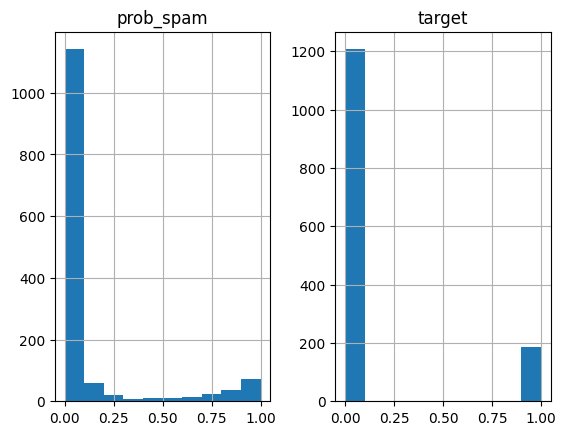

In [27]:
df_pos.hist()

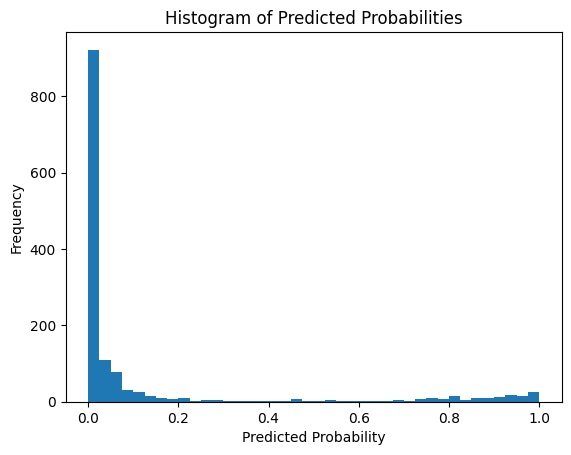

In [28]:
plt.hist(positive_probs, bins=40)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Histogram of Predicted Probabilities")
plt.show()

In [29]:
nomes_features = vectorizer.get_feature_names_out()

     Feature  Importance
1549    call    0.026652
1757   claim    0.021274
7388     www    0.021188
6849     txt    0.021057
4384  mobile    0.019948
2870    free    0.019804
293     150p    0.014954
6875      uk    0.013854
7458    your    0.012314
5531   reply    0.012178


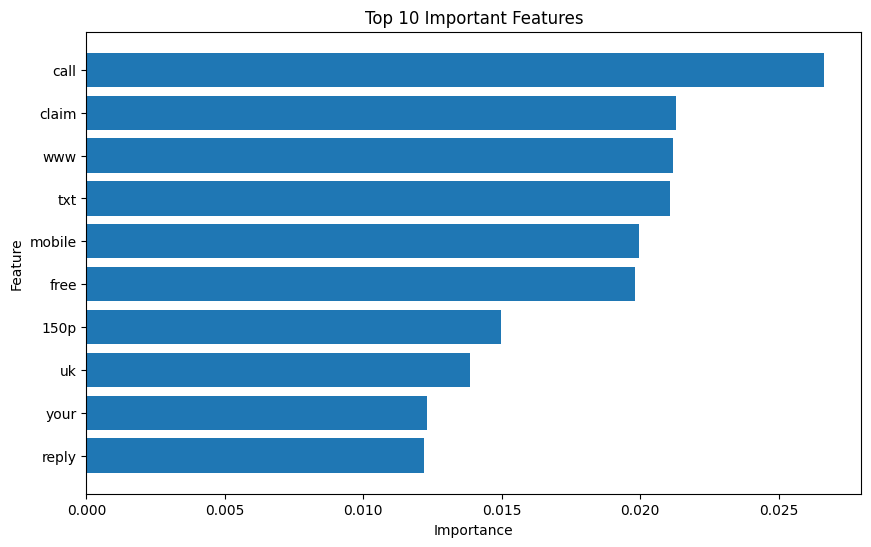

In [30]:
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to map feature names to importances
feature_names = vectorizer.get_feature_names_out()
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print or visualize the top N important features
N = 10  # Number of top features to display
print(feature_importance_df.head(N))

# Optionally, plot the feature importances
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:N], feature_importance_df['Importance'][:N])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top {} Important Features'.format(N))
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()